<a href="https://colab.research.google.com/github/myllanes/Introduction-to-Deep-Learning/blob/main/HW1_2bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

Epoch [1/150], Train Loss: 0.8978, Val Loss: 0.8383
Epoch [2/150], Train Loss: 0.7123, Val Loss: 0.7759
Epoch [3/150], Train Loss: 0.6890, Val Loss: 0.7646
Epoch [4/150], Train Loss: 0.6948, Val Loss: 0.7598
Epoch [5/150], Train Loss: 0.6680, Val Loss: 0.7599
Epoch [6/150], Train Loss: 0.6716, Val Loss: 0.7617
Epoch [7/150], Train Loss: 0.6804, Val Loss: 0.7522
Epoch [8/150], Train Loss: 0.6602, Val Loss: 0.7567
Epoch [9/150], Train Loss: 0.6438, Val Loss: 0.7565
Epoch [10/150], Train Loss: 0.6656, Val Loss: 0.7523
Epoch [11/150], Train Loss: 0.6692, Val Loss: 0.7539
Epoch [12/150], Train Loss: 0.6518, Val Loss: 0.7511
Epoch [13/150], Train Loss: 0.6576, Val Loss: 0.7570
Epoch [14/150], Train Loss: 0.6512, Val Loss: 0.7674
Epoch [15/150], Train Loss: 0.6611, Val Loss: 0.7647
Epoch [16/150], Train Loss: 0.6540, Val Loss: 0.7567
Epoch [17/150], Train Loss: 0.6710, Val Loss: 0.7581
Epoch [18/150], Train Loss: 0.6495, Val Loss: 0.7693
Epoch [19/150], Train Loss: 0.6401, Val Loss: 0.7731
Ep

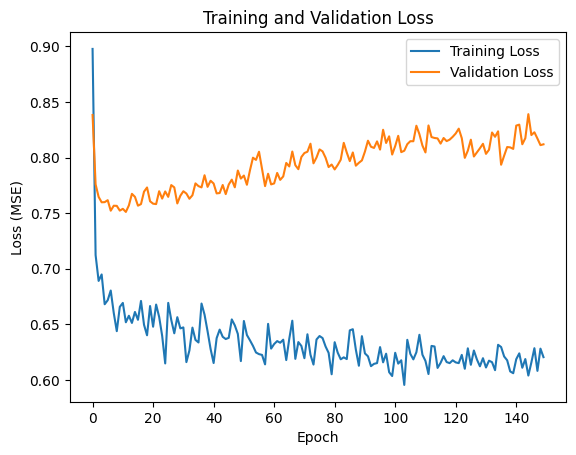

Final Training RMSE: 0.7877
Final Validation RMSE: 0.9011
Model Complexity: 11137 parameters


In [23]:
# Load data
df_train = pd.read_csv('https://raw.githubusercontent.com/myllanes/Introduction-to-Deep-Learning/refs/heads/main/Housing.csv', na_values='*')

# Select features including categorical features for one-hot encoding
usefull_cols = ['bathrooms','stories','bedrooms', 'mainroad']
df_train_prepro = df_train[usefull_cols].copy()

# Handle missing values (fill with mean for numerical columns)



# One-hot encoding for categorical variables
df_train_prepro = pd.get_dummies(df_train_prepro, columns=['mainroad'])

# Target variable
target = df_train['parking']

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(df_train_prepro, target, test_size=0.2, random_state=42) # 80/20

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

#Part2b
# Define MLP model
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(MLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         out = self.fc1(x)  #part2b
#         out = self.relu(out)
#         out = self.fc2(out)
#         return out


# Hyperparameters  #Part2b
# input_size = X_train_scaled.shape[1]  # Number of features
# hidden_size = 64  # Number of neurons in the hidden layer
# output_size = 1  # Regression output
# learning_rate = 0.001
# num_epochs = 100

#part2c
class MLPP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(MLPP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)  # Dropout for regularization

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc4(out)
        return out

# Hyperparameters #part2c
input_size = X_train_scaled.shape[1]  # Number of features
hidden_size1 = 128  # first hidden layer
hidden_size2 = 64   # second hidden layer
hidden_size3 = 32   # third hidden layer
output_size = 1     # Regression output
learning_rate = 0.001
num_epochs = 150

# Initialize model, loss, and optimizer
#model = MLP(input_size, hidden_size, output_size) #part2b
model = MLPP(input_size, hidden_size1, hidden_size2, hidden_size3, output_size) #part2c
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and validation loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Final accuracy (RMSE)
final_train_rmse = np.sqrt(train_losses[-1])
final_val_rmse = np.sqrt(val_losses[-1])
print(f'Final Training RMSE: {final_train_rmse:.4f}')
print(f'Final Validation RMSE: {final_val_rmse:.4f}')

# Model complexity
total_params = sum(p.numel() for p in model.parameters())
print(f'Model Complexity: {total_params} parameters')